# Import data and inspect

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from collections import Counter

In [3]:
train_path = 'G:/Github/GiveMeSomeCredits/data/cs-training.csv'
test_path = 'G:/Github/GiveMeSomeCredits/data/cs-test.csv'

In [4]:
df_train = pd.read_csv(train_path,index_col = 0).reset_index()
df_test = pd.read_csv(test_path,index_col = 0).reset_index()

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 12 columns):
index                                   150000 non-null int64
SeriousDlqin2yrs                        150000 non-null int64
RevolvingUtilizationOfUnsecuredLines    150000 non-null float64
age                                     150000 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    150000 non-null int64
DebtRatio                               150000 non-null float64
MonthlyIncome                           120269 non-null float64
NumberOfOpenCreditLinesAndLoans         150000 non-null int64
NumberOfTimes90DaysLate                 150000 non-null int64
NumberRealEstateLoansOrLines            150000 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    150000 non-null int64
NumberOfDependents                      146076 non-null float64
dtypes: float64(4), int64(8)
memory usage: 13.7 MB


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101503 entries, 0 to 101502
Data columns (total 12 columns):
index                                   101503 non-null int64
SeriousDlqin2yrs                        0 non-null float64
RevolvingUtilizationOfUnsecuredLines    101503 non-null float64
age                                     101503 non-null int64
NumberOfTime30-59DaysPastDueNotWorse    101503 non-null int64
DebtRatio                               101503 non-null float64
MonthlyIncome                           81400 non-null float64
NumberOfOpenCreditLinesAndLoans         101503 non-null int64
NumberOfTimes90DaysLate                 101503 non-null int64
NumberRealEstateLoansOrLines            101503 non-null int64
NumberOfTime60-89DaysPastDueNotWorse    101503 non-null int64
NumberOfDependents                      98877 non-null float64
dtypes: float64(5), int64(7)
memory usage: 9.3 MB


There is a lot of NAN in monthly Income

some missing value for number of dependents as well

Those two fields will need to be treated for missing values

Otherwise it seems an ok set of data ready for training

In [7]:
df_train.head()

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


For a quick turn around, I will just treat the columns with missing value

Then try to build a simple model with this data set

Let's pull out the missing entries to observe what should be substitute in as missing values

In [8]:
df_train[df_train['MonthlyIncome'].isnull()].sample(10)

,index,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
104976,104977,0,0.781463,34,0,1002.0,NaN,8,0,1,0,0.0
101920,101921,0,0.300777,61,0,2794.0,NaN,4,0,2,0,0.0
105833,105834,0,1.000000,38,0,1710.0,NaN,3,0,1,0,0.0
1434,1435,0,0.000000,53,0,1635.0,NaN,6,0,1,0,2.0
29638,29639,0,0.043952,75,0,44.0,NaN,5,0,0,0,0.0
79862,79863,0,1.000000,22,98,0.0,NaN,0,98,0,98,NaN
62000,62001,0,0.008500,50,0,2832.0,NaN,6,0,2,0,0.0
117888,117889,0,0.764250,32,0,1890.0,NaN,11,0,1,0,1.0
6033,6034,0,0.104345,64,0,1890.0,NaN,4,0,1,0,0.0
143177,143178,0,0.019645,71,0,13.0,NaN,5,0,0,0,0.0


Interesting, it seems that most entries have a high Debt Ratio

We can calculate to see if our hypothesis is correct

In [9]:
print("The average debt ratio for ppl without income information is {:.2f}".format(np.mean(df_train[df_train['MonthlyIncome'].isnull()].DebtRatio)))

The average debt ratio for ppl without income information is 1673.40


In [10]:
print("The average debt ratio for the full training set is {:.2f}".format(np.mean(df_train.DebtRatio)))

The average debt ratio for the full training set is 353.01


In [11]:
print("The average debt ratio for the people with income information is {:.2f}".format(np.mean(df_train[df_train['MonthlyIncome'].notnull()].DebtRatio)))

The average debt ratio for the people with income information is 26.60


It is very likely that these bunch of people without income information have zero income. So we will just fill zeros

In [12]:
df_train.MonthlyIncome.unique()

array([ 9120.,  2600.,  3042., ..., 15648.,   521.,  7647.])

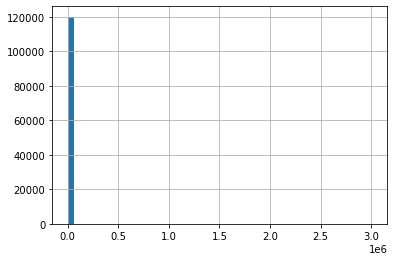

In [13]:
df_train.MonthlyIncome.hist(bins=50)

Have to say the income is super skewed

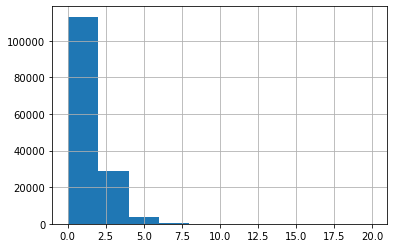

In [14]:
df_train.NumberOfDependents.hist()

Looks like most people in the data set have no dependents (0)

Let's check the mode

In [15]:
scipy.stats.mode(df_train.NumberOfDependents)

ModeResult(mode=array([0.]), count=array([86902]))

Great, for number of dependents we will fill all missing value as zeros as well

In [16]:
df_train = df_train.fillna(0)
df_test = df_test.fillna(0)

Try to take a look at the data

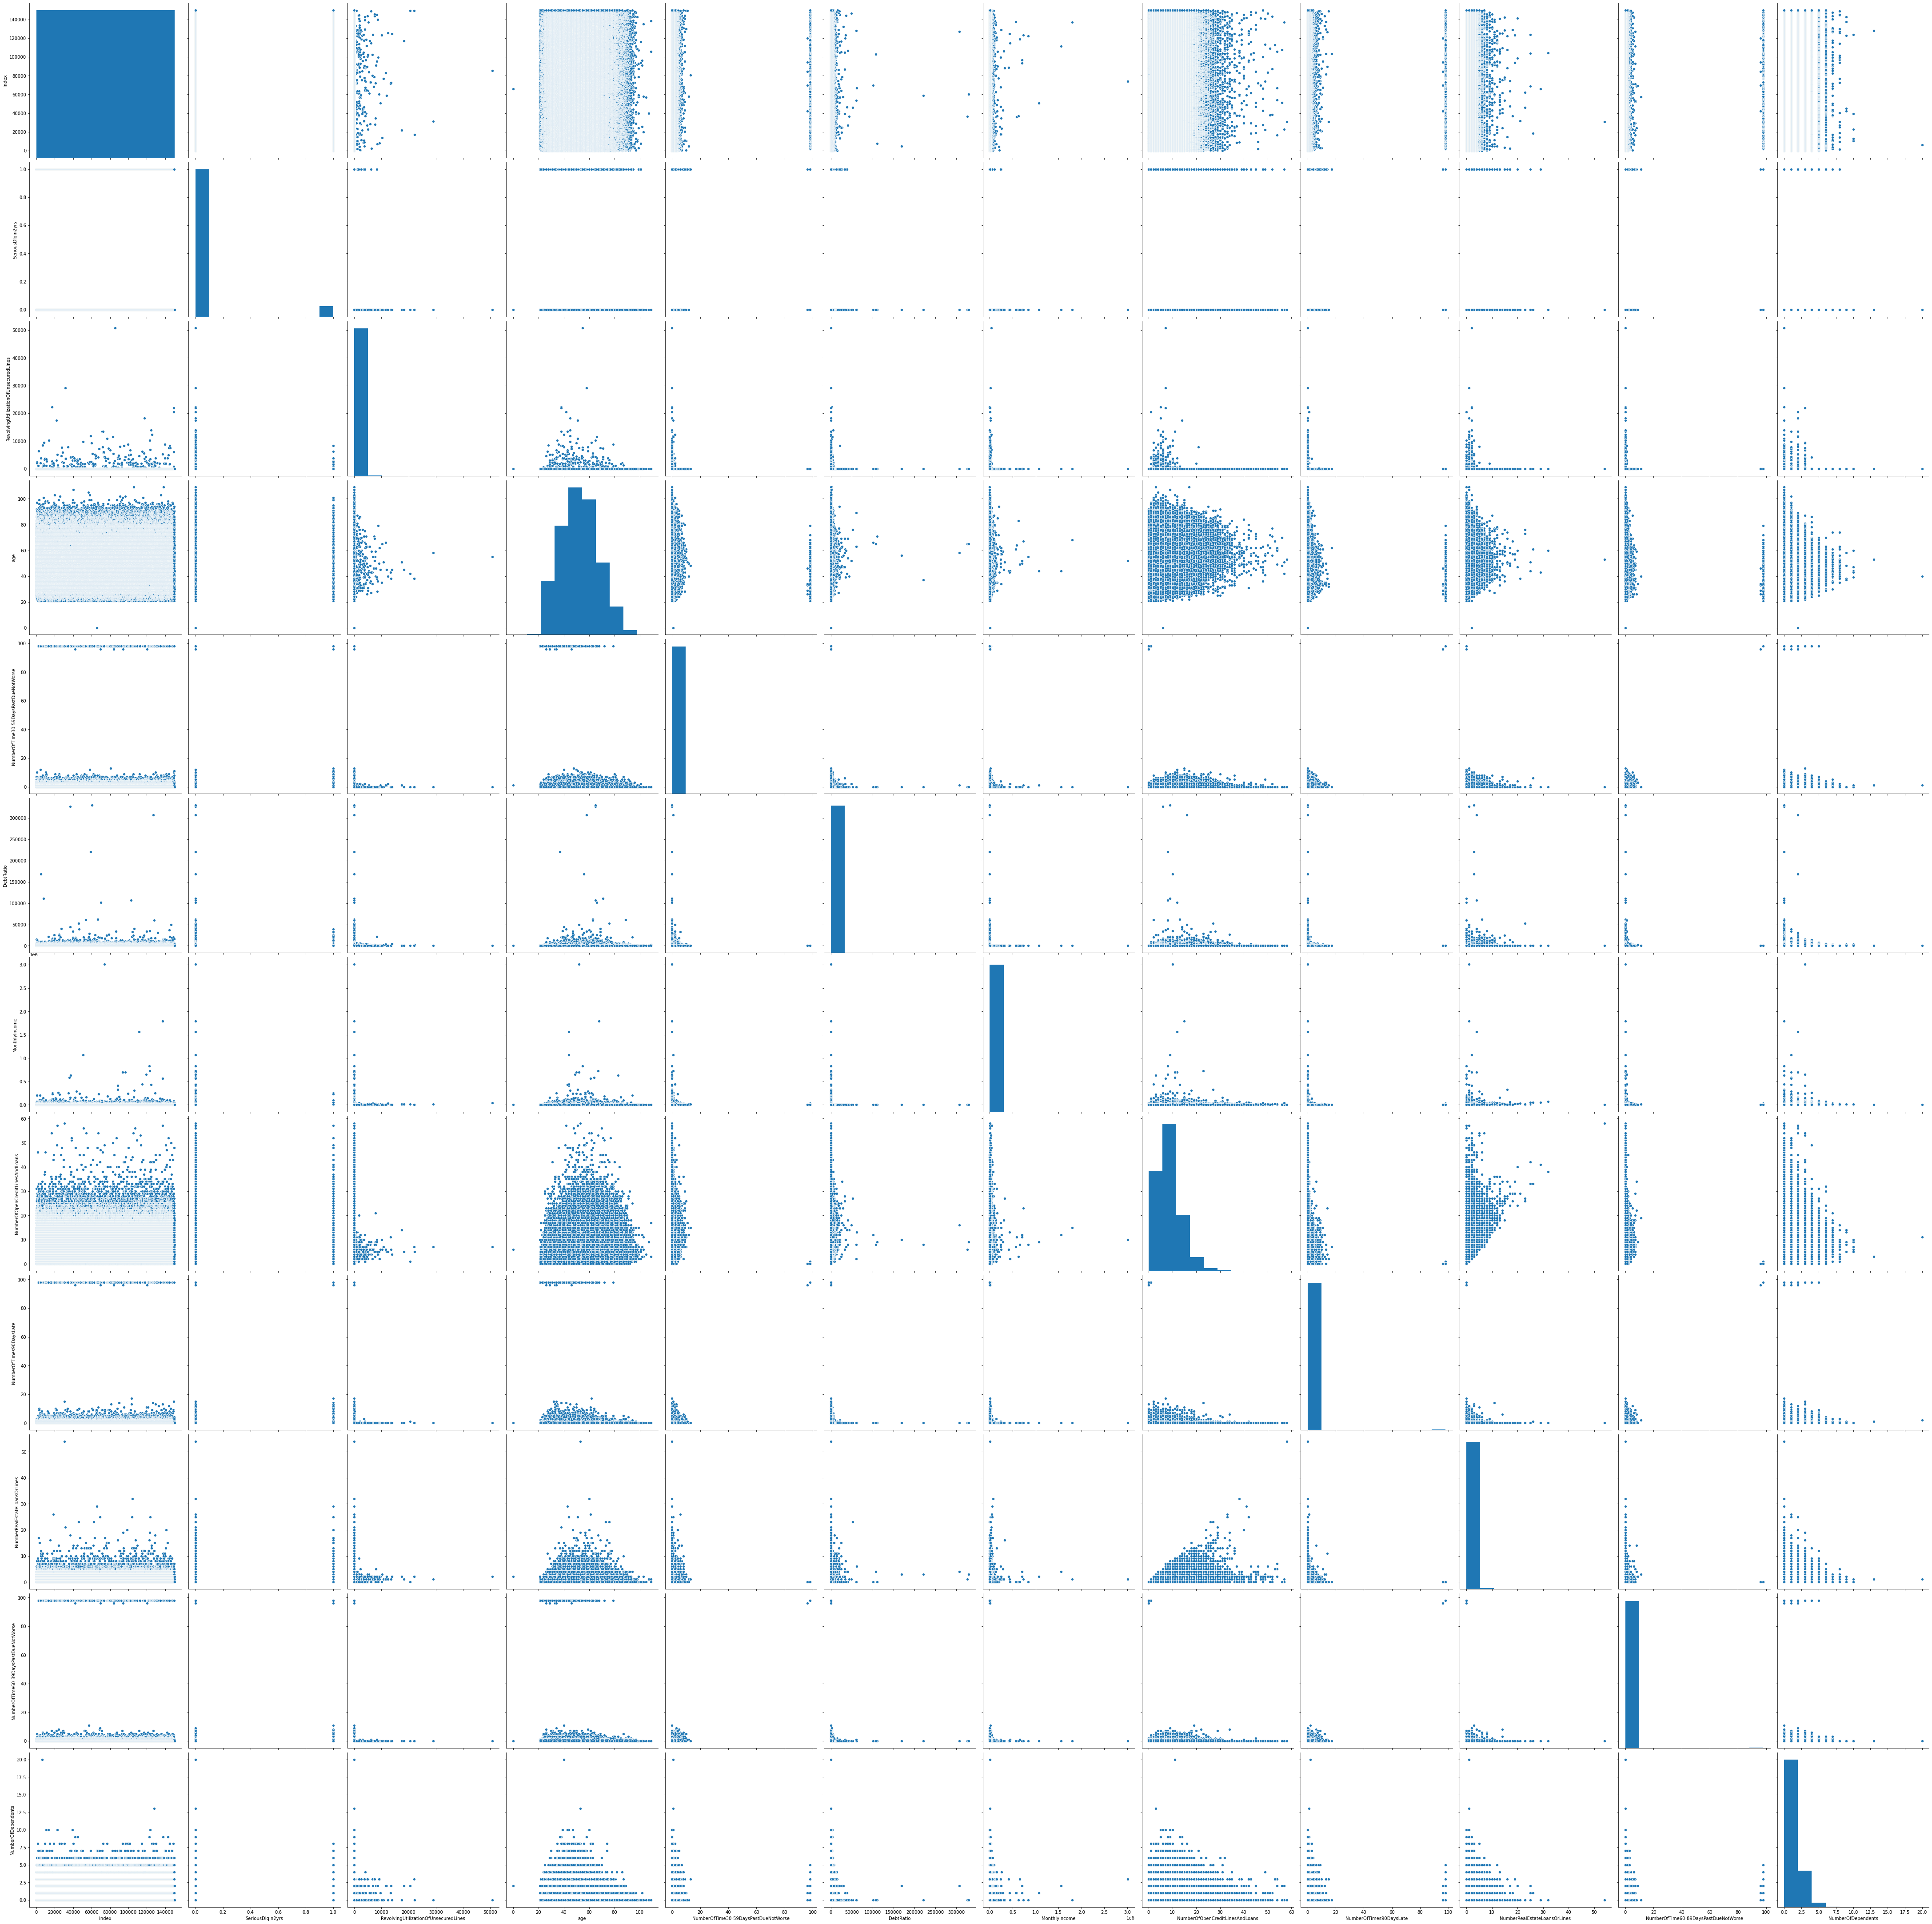

In [17]:
sns.pairplot(df_train,height=5)

Looks like we have a lot going on in the data set

probably need to scale it as input

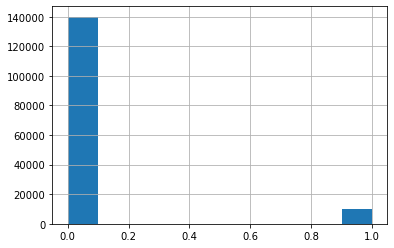

In [18]:
df_train.SeriousDlqin2yrs.hist()

In [19]:
Counter(df_train.SeriousDlqin2yrs)

Counter({1: 10026, 0: 139974})

In [1]:
10026/150000

0.06684

Our target here is heavily imbalanced.. lucky that our task is only after probability.. we may not need to use resampling methods to tackle imbalance classes

# Train a model

Let's start with a simplest binary classifier, Logistic regression as a first model

In [92]:
from sklearn.metrics import accuracy_score, f1_score,roc_auc_score,accuracy_score, confusion_matrix, roc_curve
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

In [85]:
y = df_train.SeriousDlqin2yrs
X = df_train.drop(columns=['SeriousDlqin2yrs','index'])

In [93]:
scaler = preprocessing.StandardScaler().fit(X)

In [94]:
X_scaled = scaler.transform(X)

In [90]:
model = LogisticRegressionCV(Cs = [0.9,1,2,3],cv = 5,penalty =  'l2',max_iter = 1000,random_state = 0)

In [106]:
from sklearn.model_selection import StratifiedKFold
from collections import defaultdict

def model_fit_train_score_skf (model,X,y,kfold = 5):
    '''This function takes in three arguments:model (model object), X,y
    It will be splitted by stratified k fold algo
    The data will be fitted using the model passed in by the user
    It returns the fitted model object and lists of Accuracy score as well as F1 score and AUC (area under curve)'''
    skf = StratifiedKFold(n_splits=kfold)
    results_dict = defaultdict()
    predict = []
    predict_prob = []
    Accuracy = []
    F1 = []
    AUC = []
    y_vals = []
    
    for train_index, test_index in skf.split(X, y):
        #get current split
        x_train, x_val = X[train_index], X[test_index]
        y_train, y_val = y[train_index], y[test_index]
        #fit model with latest train set
        model.fit(x_train,y_train)
        #calculate predictions
        y_pred = model.predict(x_val)
        predictions = model.predict_proba(x_val)
        predict.append(y_pred)
        predict_prob.append(predictions[:,1])
        Accuracy.append(accuracy_score(y_true=y_val, y_pred=y_pred))
        F1.append(f1_score(y_true=y_val, y_pred=y_pred))
        AUC.append(roc_auc_score(y_val, predictions[:,1]))
        y_vals.append(y_val)
    
    results_dict['y_val'] = y_vals
    results_dict['predictions'] = predict
    results_dict['predict_proba'] = predict_prob
    results_dict['Accuracy_mean'] = np.mean(Accuracy)
    results_dict['F1_mean'] = np.mean(F1)
    results_dict['AUC_mean'] = np.mean(AUC)
    results_dict['Accuracy_std'] = np.std(Accuracy)
    results_dict['F1_std'] = np.std(F1)
    results_dict['AUC_std'] = np.std(AUC)
    
    return model,results_dict

In [107]:
fitted_model,results = model_fit_train_score_skf(model,X_scaled,y)

In [108]:
print(f"Accuracy: {results['Accuracy_mean']:.3f} \nF1 score: {results['F1_mean']:.3f} \nAUC score: {results['AUC_mean']:.3f}")

Accuracy: 0.934 
F1 score: 0.078 
AUC score: 0.697


In [109]:
fitted_model.C_

array([2.])

Well maybe it works slightly better than randomly guessing. but the AUC score here is really bad

In [111]:
def plot_ROC(y_true, y_proba, AUC, figsize = (7,5), color = 'darkturquoise', title='ROC Curve'):
    '''Helper function to plot ROC graph'''
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    #set size
    plt.figure(figsize=figsize)
    #plot
    plt.plot(fpr, tpr,lw=2,c=color,label = f"AUC: {AUC:.2f}")
    #adjustments
    plt.plot([0,1],[0,1],c='grey',ls='--')
    plt.legend()
    plt.xlim([-0.05,1.05])
    plt.ylim([-0.05,1.05])
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    plt.title(title);

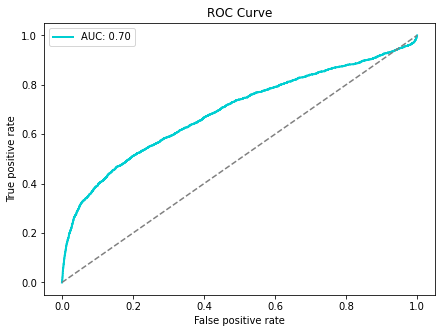

In [115]:
plot_ROC(results['y_val'][0], y_proba = results['predict_proba'][0], AUC = results['AUC_mean'])

Does not look good at all

In [116]:
X_test = df_test.drop(columns=['SeriousDlqin2yrs','index'])
X_test_scaled = scaler.transform(X_test)

In [120]:
fitted_model.predict_proba(X_test_scaled)[:,1]

array([0.05723879, 0.05089714, 0.04585922, ..., 0.03071559, 0.02283187,
       0.07948997])

In [122]:
df_test['predict'] = fitted_model.predict_proba(X_test_scaled)[:,1]

In [125]:
columns_output = ['index','predict']
output_df = pd.DataFrame(df_test[columns_output])

In [132]:
output_df = output_df.rename(columns={'index':"Id","predict":'Probability'})

In [135]:
save_path = 'G:/Github/GiveMeSomeCredits/output/1st_sub.csv'
output_df.to_csv(save_path,index=False)

Next: 

Also consider resampling, feature engineering etc

* XGB classifier

* Light GBM

* Adaboost

* Catboost